In [18]:
using Convex
using PyPlot
using ECOS
set_default_solver(ECOSSolver(verbose=0))

ECOS.ECOSSolver(Any[(:verbose, 0)])

In [2]:
function generate_data(n, w)
    X = randn(n,length(w))
    y = X*w
    return X, y
end

function generate_noisy_data(n, w)
    X = randn(n,length(w))
    y = X*w + .1*randn(n)
    return X, y
end

generate_noisy_data (generic function with 1 method)

# OLS is invariant

In [3]:
d = 10
n = 20
w = randn(d)
X, y = generate_data(n, w);

In [4]:
w = X\y
@show X*w

yscale = 5*y
Xscale = 3*X
wscale = Xscale\yscale
@show Xscale*wscale / 5;

X * w = [6.6089, -7.12315, -0.0963135, 0.0394689, 2.56376, 1.44522, -0.327432, 0.888402, 3.22935, -5.45253, -4.05059, 0.545093, -3.33106, -0.182826, -2.93786, 1.54777, 2.4913, -3.46714, 0.791616, 4.28861]
(Xscale * wscale) / 5 = 

# ridge regression is not scaling invariant

In [5]:
size(X'*X + eye(d))

(10, 10)

In [6]:
w = (X'*X + eye(d)) \ (X'*y)
@show X*w

yscale = 5*y
Xscale = 3*X
wscale = (Xscale'*Xscale + eye(d)) \ (Xscale'*yscale)
@show Xscale * wscale / 5;

X * w = [6.26418, -6.8008, -0.241732, 0.0209104, 2.41, 1.76919, -0.409291, 1.1196, 3.21675, -5.14988, -3.89819, 0.0884726, -3.25638, -0.316686, -2.78545, 1.30117, 2.02249, -3.51258, 0.780404, 4.21437]
(Xscale * wscale) / 5 = [6.56769, -7.08036, -0.122335, 0.0315721, 2.54094, 1.49794, -0.337915, 0.918686, 3.23272, -5.4103, -4.03017, 0.475783, -3.32693, -0.206264, -2.91472, 1.51526, 2.42648, -3.47643, 0.79014, 4.28054]


In [7]:
# standardize
function standardize(X,y)
    X_standard = X .- mean(X,1)
    X_standard = X_standard * diagm(1./vec(std(X,1)))
    
    y_standard = y - mean(y)
    y_standard = y_standard / std(y)
    
    return X_standard, y_standard
end

Xs, ys = standardize(X,y)
w = (Xs'*Xs + eye(d)) \ (Xs'*ys)
@show Xs*w

yscale = 5*y + 3000
Xscale = 3*X + 200

Xss, yss = standardize(Xscale,yscale)
wscale = (Xss'*Xss + eye(d)) \ (Xss'*yss)
@show Xss*wscale;

Xs * w = [1.89597, -1.92371, -0.0411448, 0.0423999, 0.746842, 0.606238, -0.076216, 0.38712, 0.986227, -1.47446, -1.08612, 0.04019, -0.885408, -0.0235994, -0.753058, 0.433342, 0.614619, -1.00341, 0.266716, 1.24746]
Xss * wscale = [1.89597, -1.92371, -0.0411448, 0.0423999, 0.746842, 0.606238, -0.076216, 0.38712, 0.986227, -1.47446, -1.08612, 0.04019, -0.885408, -0.0235994, -0.753058, 0.433342, 0.614619, -1.00341, 0.266716, 1.24746]


# let's compare different kinds of regularized regression

In [8]:
function ridge_regression(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*sumsquares(w))
    solve!(p)
    return w.value
end

ridge_regression (generic function with 1 method)

In [9]:
function lasso(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*norm(w,1))
    solve!(p)
    return w.value
end

lasso (generic function with 1 method)

In [10]:
function nnls(X,y)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y), w>=0)
    solve!(p)
    return w.value
end

nnls (generic function with 1 method)

In [11]:
# generate data

d = 30
w_randn = randn(d)
w_sparse = sprandn(d, .5)
w_pos = sprand(d, .5);

In [12]:
# find best model for each type of data
w = w_pos

X,y = generate_data(30, w)
w_ridge = ridge_regression(X,y)
w_lasso = lasso(X,y; λ=1)
w_nonneg = nnls(X,y);

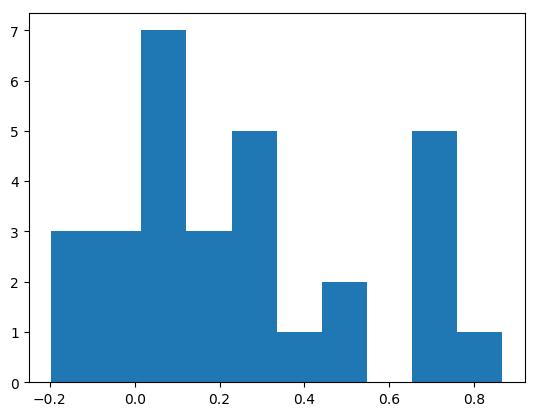

([3.0, 3.0, 7.0, 3.0, 5.0, 1.0, 2.0, 0.0, 5.0, 1.0], [-0.196988, -0.0907231, 0.0155413, 0.121806, 0.22807, 0.334334, 0.440599, 0.546863, 0.653128, 0.759392, 0.865656], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x13174a910>, PyObject <matplotlib.patches.Rectangle object at 0x13174afd0>, PyObject <matplotlib.patches.Rectangle object at 0x13175c690>, PyObject <matplotlib.patches.Rectangle object at 0x13175cd10>, PyObject <matplotlib.patches.Rectangle object at 0x1317633d0>, PyObject <matplotlib.patches.Rectangle object at 0x131763a50>, PyObject <matplotlib.patches.Rectangle object at 0x131763f50>, PyObject <matplotlib.patches.Rectangle object at 0x131779790>, PyObject <matplotlib.patches.Rectangle object at 0x131779e10>, PyObject <matplotlib.patches.Rectangle object at 0x1317874d0>])

In [13]:
plt[:hist](w_ridge)

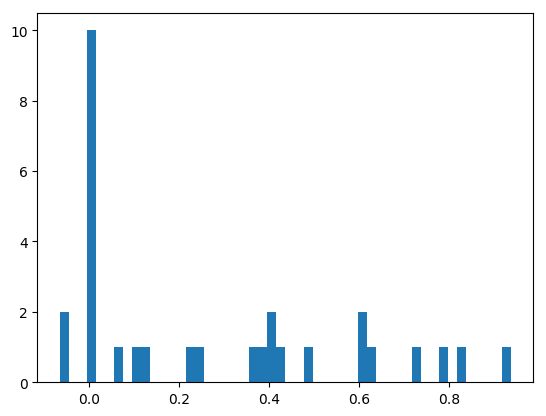

([2.0, 0.0, 0.0, 10.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0  …  0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [-0.0647887, -0.0447637, -0.0247387, -0.00471376, 0.0153112, 0.0353362, 0.0553611, 0.0753861, 0.0954111, 0.115436  …  0.756235, 0.77626, 0.796285, 0.81631, 0.836335, 0.85636, 0.876385, 0.89641, 0.916435, 0.93646], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x134a0f7d0>, PyObject <matplotlib.patches.Rectangle object at 0x134a0fe50>, PyObject <matplotlib.patches.Rectangle object at 0x134a1b510>, PyObject <matplotlib.patches.Rectangle object at 0x134a1bb90>, PyObject <matplotlib.patches.Rectangle object at 0x134a28250>, PyObject <matplotlib.patches.Rectangle object at 0x134a288d0>, PyObject <matplotlib.patches.Rectangle object at 0x134a28f50>, PyObject <matplotlib.patches.Rectangle object at 0x134a34610>, PyObject <matplotlib.patches.Rectangle object at 0x134a34c90>, PyObject <matplotlib.patches.Rectangle object at 0x134a42350>  …  PyObject <matplotlib.patches.R

In [14]:
plt[:hist](w_lasso, bins=50)

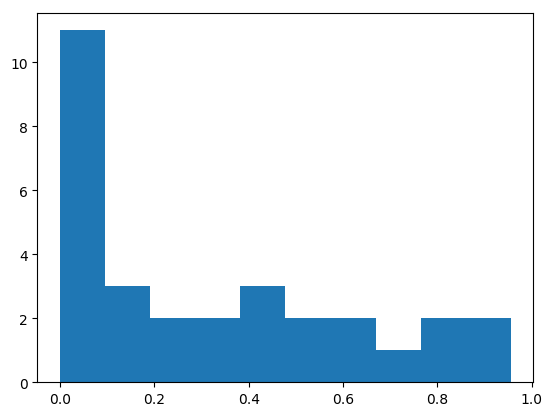

([11.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0], [4.88935e-7, 0.0955747, 0.191149, 0.286723, 0.382297, 0.477871, 0.573446, 0.66902, 0.764594, 0.860168, 0.955742], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x134cc0810>, PyObject <matplotlib.patches.Rectangle object at 0x134cc0e90>, PyObject <matplotlib.patches.Rectangle object at 0x134cce550>, PyObject <matplotlib.patches.Rectangle object at 0x134ccebd0>, PyObject <matplotlib.patches.Rectangle object at 0x134cd9290>, PyObject <matplotlib.patches.Rectangle object at 0x134cd9910>, PyObject <matplotlib.patches.Rectangle object at 0x134cd9f90>, PyObject <matplotlib.patches.Rectangle object at 0x134ce8650>, PyObject <matplotlib.patches.Rectangle object at 0x134ce8cd0>, PyObject <matplotlib.patches.Rectangle object at 0x134cf4390>])

In [15]:
plt[:hist](w_nonneg)

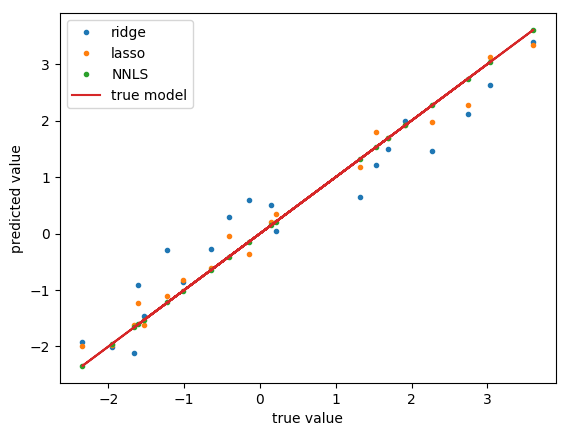

PyObject <matplotlib.text.Text object at 0x134b0fc50>

In [16]:
# which fits data best?
Xtest,ytest = generate_data(20,w)

plot(ytest,Xtest*w_ridge,label="ridge",".")
plot(ytest,Xtest*w_lasso,label="lasso",".")
plot(ytest,Xtest*w_nonneg,label="NNLS",".")
plot(ytest,ytest,label="true model")
legend()
xlabel("true value")
ylabel("predicted value")

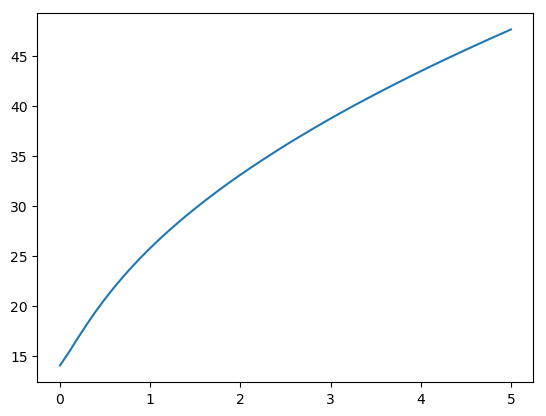

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x113793690>

In [17]:
# cross validate over lambda

w = .5*randn(40)
X,y = generate_noisy_data(30, w)
Xtest,ytest = generate_noisy_data(30, w)

error = Float64[]
λs = 0:.1:5
for λ in λs
    w = ridge_regression(X,y; λ=λ)
    push!(error, sum((ytest - Xtest*w).^2))
end
plot(λs, error)